# Hotel Caesar 

![](https://github.com/bosea3000/Projects/raw/master/Caesars-Staffing-Problem/Images/Caesar.png)

# Financial Data

![](https://github.com/bosea3000/Projects/raw/master/Caesars-Staffing-Problem/Images/Financials.png)

# Workflow

![](https://github.com/bosea3000/Projects/raw/master/Caesars-Staffing-Problem/Images/FlowChart.png)

# Pre-analysis Exploration

## Histograms:

In [1]:
from bokeh.layouts import row
from bokeh.plotting import figure, show, output_file
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [2]:
from bokeh.charts import Histogram, output_file, show
import pandas as pd

df = pd.read_csv('Transform-Data/TrainData.csv')

In [3]:
from bokeh.charts import Bar, show
df.sort('Year')
p = Bar(df, label='Year', values='checkins', agg='sum',
        title="Average checkins by Year", legend = False, color = 'blue')
p.background_fill_color = "beige"
p.background_fill_alpha = 0.5
p.ygrid.grid_line_alpha = 0.5
p.outline_line_width = 7
p.outline_line_alpha = 0.3
p.outline_line_color = "navy"

#output_file("bar.html")

show(p)

/Users/XinyiLu/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [4]:
from bokeh.charts import Bar, show
df.sort('Days')
p = Bar(df, label='Months', values='checkins', agg='mean',
        title="Average checkins by Months", legend = False)
p.background_fill_color = "beige"
p.background_fill_alpha = 0.5
p.ygrid.grid_line_alpha = 0.5
p.ygrid.grid_line_dash = [6, 4]
p.outline_line_width = 7
p.outline_line_alpha = 0.3
p.outline_line_color = "navy"

#output_file("bar.html")

show(p)

/Users/XinyiLu/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [5]:
df.sort('Days')
from bokeh.plotting import figure

p = Bar(df, label='Days', values='checkins', agg='mean',
        title="Average checkins by Days", legend= False, color = 'navy')
p.outline_line_width = 7
p.outline_line_alpha = 0.3
p.outline_line_color = "navy"
p.background_fill_color = "beige"
p.background_fill_alpha = 0.5
p.ygrid.grid_line_alpha = 0.5

#output_file("bar.html")

show(p)

/Users/XinyiLu/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [6]:
df.sort('Holidays')
p = Bar(df, label='Holidays', values='checkins', agg='sum',
        title="Total checkins by Holidays", legend= False)
p.outline_line_width = 7
p.outline_line_alpha = 0.3
p.outline_line_color = "navy"
p.background_fill_color = "beige"
p.background_fill_alpha = 0.5
p.ygrid.grid_line_alpha = 0.5
#output_file("bar.html")

show(p)

/Users/XinyiLu/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


## Box plots:

In [7]:
dfmv = pd.read_csv('Transform-Data/TrainData2.csv',header = 0, na_values = 'NA')

In [8]:
headers = df.dtypes.index

In [9]:
from bokeh.charts import BoxPlot, output_file, show
from bokeh.layouts import row
#from bokeh.sampledata.autompg import autompg as df

# origin = the source of the data that makes up the autompg dataset


# color by one dimension and label by two dimensions
# coloring by one of the columns visually groups them together

box = BoxPlot(dfmv, values='checkins', label='Jan', plot_width=200, plot_height=200 , color='Jan')
box1 = BoxPlot(dfmv, values='checkins', label='Nov', plot_width=200, plot_height=200 ,color='Nov')
box2 = BoxPlot(dfmv, values='checkins', label='Sun', plot_width=200, plot_height=200 ,color='Sun' )
box3 = BoxPlot(dfmv, values='checkins', label='Fri', plot_width=200, plot_height=200 ,color='Fri' )
box4 = BoxPlot(dfmv, values='checkins', label='Xmas', plot_width=200, plot_height=200 ,color='Xmas' )
box5 = BoxPlot(dfmv, values='checkins', label='Valentines', plot_width=200, plot_height=200 ,color='Valentines' )



#output_file('box.html')
show(row(box,box1,box2,box3,box4,box5))
#output_file("boxplot_single.html", title="boxplot_single.py example")

#show(box)

## Multivariate:

In [10]:
from __future__ import print_function

from bokeh.document import Document
from bokeh.embed import file_html
from bokeh.layouts import gridplot
from bokeh.models.glyphs import Circle
from bokeh.models import (BasicTicker, ColumnDataSource, Grid, LinearAxis,
                         DataRange1d, PanTool, Plot, WheelZoomTool)
from bokeh.resources import INLINE
from bokeh.sampledata.iris import flowers
from bokeh.util.browser import view

colormap = {1: 'red', 0: 'green'}

dfmv['checkins'] = dfmv['JewishHoliday'].map(lambda x: colormap[x])


source = ColumnDataSource(
    data=dict(
        RewardsCardholder=dfmv['RewardsCardholder'],
        SpecialEventCustomer=dfmv['SpecialEventCustomer'],
        FreeAndIndependentTraveler=dfmv['FreeAndIndependentTraveler'],
        WholeSaleCustomer=dfmv['RewardsCardholder'],
        GroupMemberCustomer=dfmv['GroupMemberCustomer'],
        AvgRoomRateFofIndepedentTraveler=dfmv['AvgRoomRateFofIndepedentTraveler'],
        checkins=dfmv['checkins'],
    )
)

xdr = DataRange1d(bounds=None)
ydr = DataRange1d(bounds=None)

def make_plot(xname, yname, xax=False, yax=False):
    mbl = 40 if yax else 0
    mbb = 40 if xax else 0
    plot = Plot(
        x_range=xdr, y_range=ydr, background_fill_color="#efe8e2",
        border_fill_color='white', plot_width=200 + mbl, plot_height=200 + mbb,
        min_border_left=2+mbl, min_border_right=2, min_border_top=2, min_border_bottom=2+mbb)

    circle = Circle(x=xname, y=yname, fill_color="checkins", fill_alpha=0.2, size=4, line_color="checkins")
    r = plot.add_glyph(source, circle)

    xdr.renderers.append(r)
    ydr.renderers.append(r)

    xticker = BasicTicker()
    if xax:
        xaxis = LinearAxis()
        plot.add_layout(xaxis, 'below')
        xticker = xaxis.ticker
    plot.add_layout(Grid(dimension=0, ticker=xticker))

    yticker = BasicTicker()
    if yax:
        yaxis = LinearAxis()
        plot.add_layout(yaxis, 'left')
        yticker = yaxis.ticker
    plot.add_layout(Grid(dimension=1, ticker=yticker))

    plot.add_tools(PanTool(), WheelZoomTool())

    return plot

xattrs = ["RewardsCardholder","SpecialEventCustomer","FreeAndIndependentTraveler","RewardsCardholder","GroupMemberCustomer","AvgRoomRateFofIndepedentTraveler"]
yattrs = list(reversed(xattrs))
plots = []

for y in yattrs:
    row = []
    for x in xattrs:
        xax = (y == yattrs[-1])
        yax = (x == xattrs[0])
        plot = make_plot(x, y, xax, yax)
        row.append(plot)
    plots.append(row)

grid = gridplot(plots)

doc = Document()
doc.add_root(grid)

if __name__ == "__main__":
    doc.validate()
    filename = "iris_splom.html"
    with open(filename, "w") as f:
        f.write(file_html(doc, INLINE, "Iris Data SPLOM"))
    print("Wrote %s" % filename)
    view(filename)

Wrote iris_splom.html


# Dotplot:

Explore the coefficients fo each of the independent variables

In [11]:
from bokeh.layouts import row
from bokeh.plotting import figure, show, output_file
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [12]:
factors = ["X1st.of.Month",
"X15th.of.Month",
"JewishHoliday",
"CNY15Days",
"CNY7Days",
"ChineseNewYear",
"SuperBowl",
"Valentines",
"Halloween",
"NewYear'sDay",
"MartinLutherKingDay",
"Pres.Day",
"Easter",
"Memorial",
"MotherDay",
"FatherDay",
"July.4th",
"LaborDay",
"ColumbusDay",
"VeteransDay",
"ThxGiving",
"Xmas",
"LongWKend",
"Jan",
"Feb",
"Mar",
"Apr",
"May",
"Jun",
"Jul",
"Aug",
"Sep",
"Oct",
"Nov",
"Sun",
"Mon",
"Tue",
"Wed",
"Thu",
"Fri",
"RewardsCardholder",
"SpecialEventCustomer",
"FreeAndIndependentTraveler",
"WholeSaleCustomer",
"GroupMemberCustomer",
"AvgRoomRateFofIndepedentTraveler"]

x =  [70.09011589,
154.3671354,
13.44997604,
7.22065767,
147.1746085,
21.77346785,
-771.2636539,
-434.3927166,
-374.9450608,
-515.7056398,
1040.608809,
1445.769212,
-145.6067709,
347.0164622,
-25.95016057,
-48.66063418,
-270.7105155,
136.8744036,
73.41669628,
169.3185561,
213.2460654,
-250.1389057,
-174.336851,
32.26334937,
81.78795756,
37.47574626,
99.73011693,
62.85859928,
-12.10380021,
11.25824005,
55.81321054,
52.24021755,
110.3417472,
41.48314857,
576.5211521,
300.2571907,
104.8750951,
149.4442819,
257.7485607,
581.0283683,
0.32981387,
0.134047735,
0.409743303,
0.026037363,
0.232772691,
-0.358254948]

dot = figure(title="Categorical Dot Plot", tools="", toolbar_location=None,
            y_range=factors, x_range=[-800,1500])

dot.segment(0, factors, x, factors, line_width=2, line_color="green", )
dot.circle(x, factors, size=15, fill_color="orange", line_color="green", line_width=3, )

factors = ["foo", "bar", "baz"]
x = ["foo", "foo", "foo", "bar", "bar", "bar", "baz", "baz", "baz"]
y = ["foo", "bar", "baz", "foo", "bar", "baz", "foo", "bar", "baz"]
colors = [
    "#0B486B", "#79BD9A", "#CFF09E",
    "#79BD9A", "#0B486B", "#79BD9A",
    "#CFF09E", "#79BD9A", "#0B486B"
]

hm = figure(title="Categorical Heatmap", tools="hover", toolbar_location=None,
            x_range=factors, y_range=factors)
hm.rect(x, y, color=colors, width=1, height=1)

#output_file("categorical.html", title="categorical.py example")

show(row(dot, sizing_mode="scale_width"))

# Forecasts：

In [13]:
import csv
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
df = pd.read_csv('Transform-Data/ForecastData.csv')
df

,Date,ActualCheckins,Predicted-MA,Predicted-Reg
0,1/1/10 0:00,650,0,812.515115
1,1/2/10 0:00,1028,0,641.811214
2,1/3/10 0:00,944,0,1131.799437
3,1/4/10 0:00,1086,0,981.261214
4,1/5/10 0:00,1071,0,850.613456
5,1/6/10 0:00,1498,0,1025.782802
6,1/7/10 0:00,977,0,1079.030033
7,1/8/10 0:00,899,0,1448.109028
8,1/9/10 0:00,801,0,924.140511
9,1/10/10 0:00,1020,0,1384.140412


# Prediction from Moving Average Method and the Actual values：

![](https://github.com/bosea3000/Projects/raw/master/Caesars-Staffing-Problem/Images/Forecast-MovingAvg.png)

# Prediction from Regression Method and the Actual values：

![](https://github.com/bosea3000/Projects/raw/master/Caesars-Staffing-Problem/Images/Forecast-Causal.png)

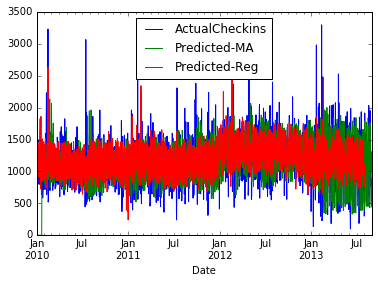

In [15]:
df.Date = pd.to_datetime(df['Date'], format='%m/%d/%y %H:%M')
df.set_index(['Date'],inplace=True)
df.plot()

From the graph we can see that the regression model fits better than the moving average model.

Smaller MAPE for Regression and less Maximum error compared to Moving Average .

![](https://github.com/bosea3000/Projects/raw/master/Caesars-Staffing-Problem/Images/MAPE.png)